In [1]:
import baltic as bt
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import math
import pickle
import numpy as np
import random

In [2]:
trees = {  'pol, vif (6)': bt.loadNexus('./hostMatrix_6_2016-03-21.mcc', absoluteTime=False),
            'env (9)': bt.loadNexus('./hostMatrix_9_2016-03-21.mcc', absoluteTime=False),
            'gag (2)': bt.loadNexus('./hostMatrix_2_2016-03-21.mcc', absoluteTime=False)}

common_names = pickle.load(open('/Users/Sidney/Dropbox/siv/figures/common_names.p', 'rb'))
sizes = pickle.load(open('/Users/Sidney/Dropbox/siv/figures/sizes.p', 'rb'))
colors = pickle.load(open('/Users/Sidney/Dropbox/siv/figures/colors.p', 'rb'))
strain_names = pickle.load(open('/Users/Sidney/Dropbox/siv/figures/strain_names.p', 'rb'))


def is_monophyletic(node, trait):
    n_states = len(set([k.traits[trait] for k in tree.traverse_tree(node, include_all=True) if isinstance(k, bt.leaf)]))
    if n_states == 1:
        return True
    else:
        return False

def strainName(taxaName):
    strain = taxaName.split('|')[4].lower()
    if strain.startswith('H'):
        return 'HIV-%s'%strain[1]
    else:
        return 'SIV'+taxaName.split('|')[4].lower()    
    
for gene, tree in trees.items():
    for n in sorted(tree.nodes,key=lambda x: -x.height):
        if n.parent.index =='Root' or is_monophyletic(n.parent, 'host'):
            continue
        elif is_monophyletic(n, 'host'):
            try:
                strain = strainName( [ k.name for k in n.children if isinstance(k, bt.leaf) ][0] )
                new_name = '%s_%d'%(strain, random.randint(500,1000))
            except:
                new_name = '%d'%(random.randint(500,1000))
            tree.collapse(n, new_name)
    tree.drawTree()


Tree height: 1.521377
Tree length: 35.559380

Tree is strictly bifurcating = True

Tree is multitype = False

Tree has annotations = True

Numbers of objects in tree: 467 (233 nodes and 234 leaves)


Tree height: 1.325627
Tree length: 43.826163

Tree is strictly bifurcating = True

Tree is multitype = False

Tree has annotations = True

Numbers of objects in tree: 291 (145 nodes and 146 leaves)


Tree height: 1.169393
Tree length: 24.343463

Tree is strictly bifurcating = True

Tree is multitype = False

Tree has annotations = True

Numbers of objects in tree: 279 (139 nodes and 140 leaves)



In [3]:
CDS = {'vpu': [6045, 6310, 2], 
       'tat_1': [5831,6045,2], 
       'tat_2': [8379,8469,3],
       "3' LTR": [9086, 9719, 2], 
       'vif': [5041, 5558, 3], 
       "vif_3'": [5559,5619,3],
       'vpr': [5559, 5850, 1], 
       'rev_1': [5970, 6045, 1], 
       'rev_2':[8379,8653,2],
       "5' LTR": [1, 634, 3], 
       'nef': [8797, 9417, 3], 
       'env': [6225, 8795, 1], 
       'gag': [790, 2292, 3],
        'int': [3527, 5096, 1], 
       'pol': [2085, 3526, 1], 
#       'pol': [2085,5096,1]
      }


breakpoints = [1343.,1951.,2291.,3526.,4438.,5558.,5896.,6567.,6974.,7716.,8616.]

three_prime = ["vif_3'", 'tat_1', 'tat_2', 'rev_1', 'vpu', 'vpr', 'rev_2', 'env', 'rev', 'nef']
middle = ['vif', 'int']

def desaturate(color, s): # Adjust (R,G,B,A) tuple by saturation proportion s
    if s > 0.85:
        return color
    else:
        i = [ float(c)*(float(s)) for c in color[:3]]
        i.append(s)
    return tuple(i)

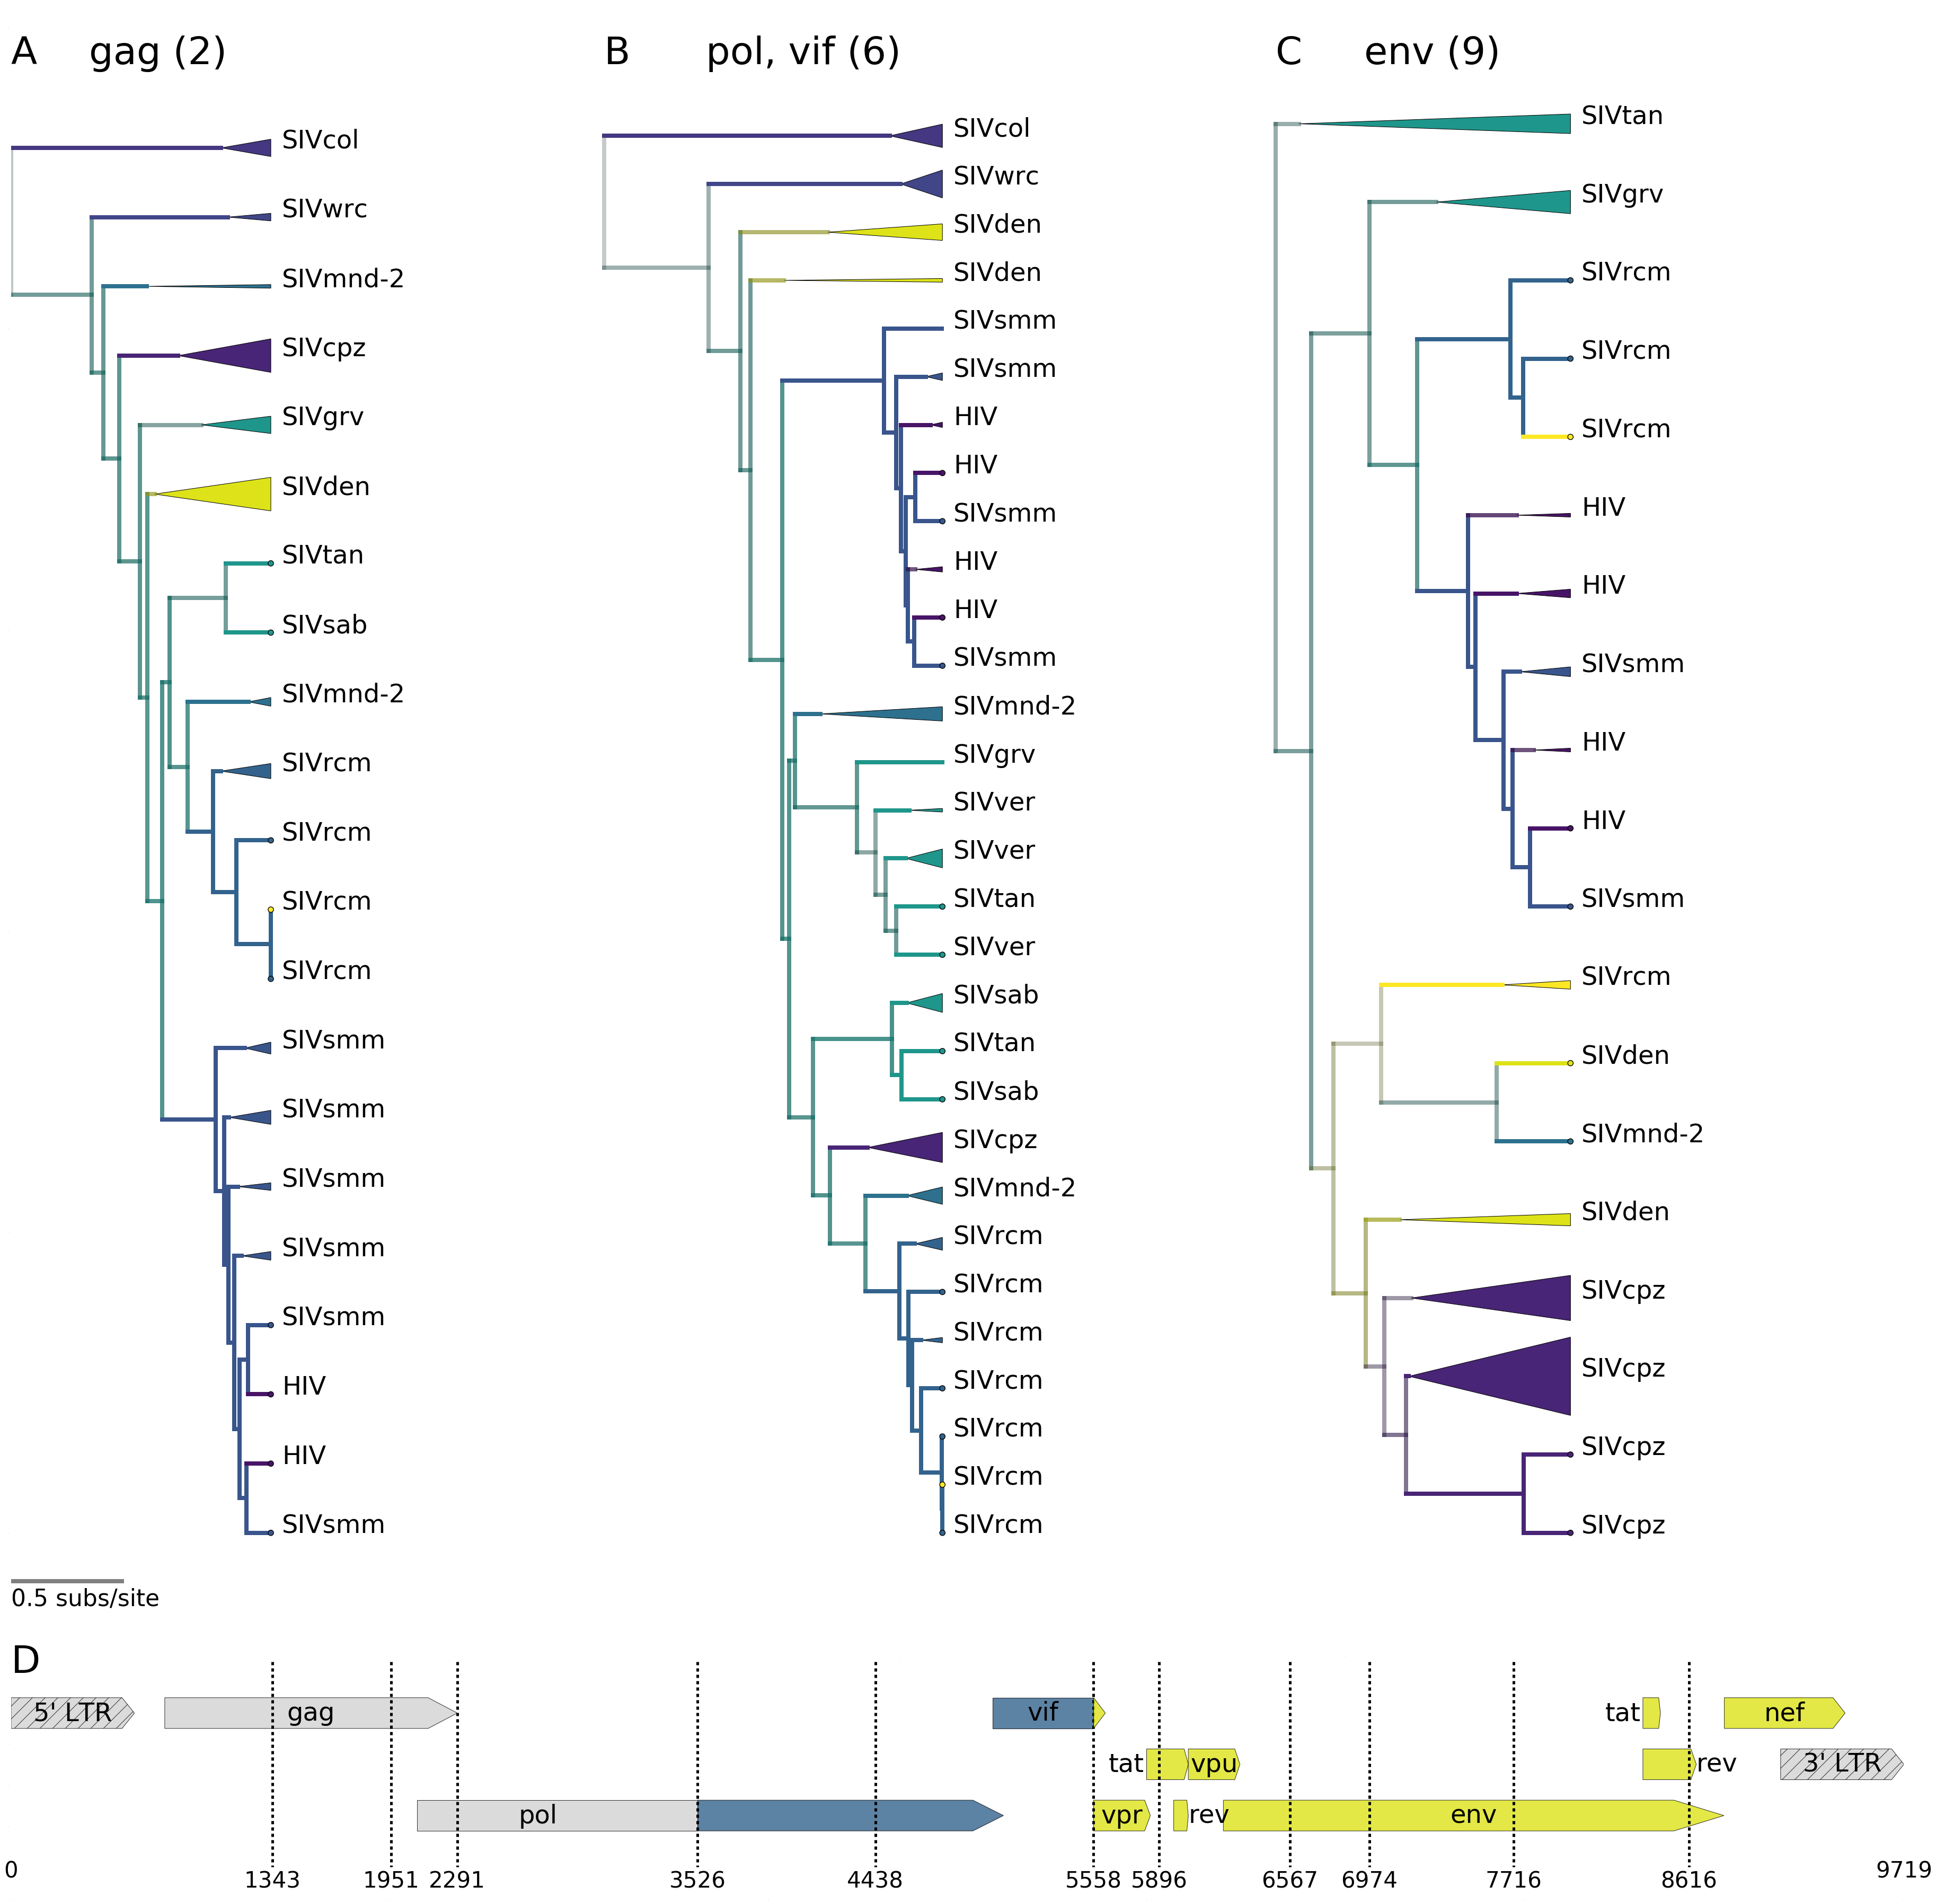

In [4]:
##########
## Plot genome map & breakpoints
##########

fig, (tr_ax, genome) = plt.subplots(2, figsize=(50,50), gridspec_kw = {'height_ratios':[7, 1]}) #sharex=True)

genomeL=9719.0

def rescale(x):
    return (float(x)/genomeL)

for gene, i in CDS.items():
    length = rescale(i[1]-i[0])
    if gene.startswith('rev'):
        genome.text(rescale(i[0])+length, 0.25*i[2],'rev',va='center',ha='left',size=48,zorder=11)
    elif gene.startswith('tat'):
        genome.text(rescale(i[0])-.02, 0.25*i[2],'tat',va='center',ha='left',size=48,zorder=11)
    elif gene == 'int' or gene=="vif_3'":
        pass
    elif gene=='pol':
        genome.text(rescale(i[0])+0.5*length, 0.25*i[2],'%s'%(gene),va='center',ha='right',size=48,zorder=11)
    else:
        genome.text(rescale(i[0])+0.5*length, 0.25*i[2],'%s'%(gene),va='center',ha='center',size=48,zorder=11)

    if gene in three_prime:
        c = colors['Mona_Monkey']
    elif gene in middle:
        c = colors['Red-capped_Mangabey']
    else:
        c = 'lightgray'
    if gene == 'pol' or gene=='vif':
        genome.arrow(rescale(i[0]), .25*i[2], length, 0.0, alpha=0.8,head_width=0.15, width=0.15,head_length=0.0,length_includes_head=True,facecolor=c)
    elif gene=="vif_3'":
        genome.arrow(rescale(i[0]), .25*i[2], length, 0.0, alpha=0.8,head_width=0.15, width=0.15,head_length=length,length_includes_head=True,facecolor=c,zorder=11)        
    elif 'LTR' in gene:
        genome.arrow(rescale(i[0]), .25*i[2], length, 0.0, hatch='/', alpha=0.8,head_width=0.15, width=0.15,head_length=0.1*rescale(i[1]-i[0]),length_includes_head=True,facecolor=c)
    else:
        genome.arrow(rescale(i[0]), .25*i[2], length, 0.0, alpha=0.8,head_width=0.15, width=0.15,head_length=0.1*rescale(i[1]-i[0]),length_includes_head=True,facecolor=c)
        
plt.eventplot([rescale(bp) for bp in breakpoints], orientation='horizontal', lineoffsets=0.5,
          linelengths=1, linewidths=5, linestyles='dashed', color='k')
genome.text(0, -0.05, '0', size=42, ha='center')
genome.text(1, -0.05, '9719', size=42, ha='center')
for bp in breakpoints:
    genome.text(rescale(bp), -0.10, '%d'%int(bp), size=42, ha='center')

##########
## Plot trees
##########

cumulative_displace=0 ## this tracks the "current" x position, so trees are plotted one after another
branchWidth=8 ## increase branch width, since trees will be smaller

tree_names=['gag (2)', 'pol, vif (6)', 'env (9)'] ## define order in which dict will be accessed
maxW = []
for t in trees.values():
    maxW += [ k.width for k in t.Objects if isinstance(k,bt.clade) ]
maxW = float(max(maxW))
maxX,maxY = 0.0, 0.0
label_x = {}

y_scale_factors = {0:1.15, 1:0.80, 2:1.3}

for t,tr in enumerate(tree_names): ## iterate over trees
    cur_tree=trees[tr] ## fetch tree object
    label_x[tr] = (cumulative_displace, cur_tree.treeHeight*0.3 + cumulative_displace)
    syf = y_scale_factors[t]
    
    for k in cur_tree.Objects: ## iterate over branches
        label = strain_names[k.traits['host']]
 
        x=k.height ## or use absolute time instead
        y=k.y*syf ## get y position from .drawTree that was run earlier, but could be anything else
        xp=k.parent.height ## get x position of current object's parent
        if x==None: ## matplotlib won't plot Nones, like root
            x=0.0
        if xp==None:
            xp=x    
        x+=cumulative_displace ## adjust branch position by displacement, which depends on the position of tree in the overall plot
        xp+=cumulative_displace ## same for branch's parent
        maxX = max(x, maxX)
        maxY = max(y, maxY)
        
        if k.traits.has_key('host') and k.traits.has_key('host.prob'):
            c_desat=desaturate(colors[k.traits['host']], k.traits['host.prob']) ## can be discrete too
            c = colors[k.traits['host']]
        else:
            c, c_desat='k', 'k'
        if k.branchType=='leaf': ## if leaf...
            s=80 ## tip size can be fixed
            if isinstance(k, bt.clade):
                left, right = x, cumulative_displace+cur_tree.treeHeight
                width = max((k.width / maxW)*syf, 0.06)
                
                points = [[left, y], [right,y+0.5*width], [right,y-0.5*width]]
                tr_ax.add_patch(plt.Polygon(points, facecolor=c, zorder=8, edgecolor=None) )
                tr_ax.text(cur_tree.treeHeight+cumulative_displace+0.05,y,label, size=48)


            else:
                tr_ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
                tr_ax.scatter(x,y,s=s+0.7*s,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath
                tr_ax.text(cur_tree.treeHeight+cumulative_displace+0.05,y,label, size=48)
            
        elif isinstance(k,bt.node): ## if node...
            tr_ax.plot([x,x],[k.children[-1].y*syf,k.children[0].y*syf],lw=branchWidth,color=c_desat,ls='-',zorder=9) ## plot vertical bar

        tr_ax.plot([xp,x],[y,y],lw=branchWidth,color=c_desat,ls='-',zorder=9) ## always plot branch
        
    cumulative_displace+=cur_tree.treeHeight+1.5 ## increment displacement by the height of the tree

tr_ax.plot([0.0,0.5],[-0.8,-0.8], lw=branchWidth, color='gray', ls='-')
tr_ax.text(0.0, -1.2, '0.5 subs/site', fontsize=44)

subfigs=['A', 'B', 'C']
for subfig,label in zip(subfigs,tree_names):
    tr_ax.text(label_x[label][1], maxY+1, label, fontsize=72)
    tr_ax.text(label_x[label][0], maxY+1, subfig, fontsize=72)
    
genome.text(0.0, 1.0, 'D', fontsize=72, ha='left', va='center')
    
tr_ax.set_ylim(-2.0,maxY+2.0) ## set y limits
tr_ax.set_xlim(0.0, maxX+1.5)

tr_ax.spines['top'].set_visible(False)
tr_ax.spines['right'].set_visible(False)
tr_ax.spines['left'].set_visible(False)
tr_ax.spines['bottom'].set_visible(False)

tr_ax.tick_params(axis='x',labelsize=0,size=0)
tr_ax.tick_params(axis='y',labelsize=0,size=0)

genome.set_ylim(-0.15, 1.0) ## set y limits
genome.set_xlim(0.0, 1.0)

genome.spines['top'].set_visible(False)
genome.spines['right'].set_visible(False)
genome.spines['left'].set_visible(False)
genome.spines['bottom'].set_visible(False)

genome.tick_params(axis='x',labelsize=0,size=0)
genome.tick_params(axis='y',labelsize=0,size=0)

plt.tight_layout()
# plt.save
plt.show()

### Figure 2: Cross-species transmissions are inferred from tree topologies; SIVcpz has mosaic origins.

**A,B,C** - Bayesian maximum clade credibility (mcc) trees are displayed for segments 2 (gag - **A**), 6 (int and vif - **B**), and 9 (env - **C**) of the main dataset (N=423). Tips are color coded by known host species; internal nodes and branches are colored by inferred host species, with saturation indicating the confidence of these assignments. An example of likely cross-species transmission is boxed in **C**, where the host state at the internal node (COLOR / HOST) is incongruent with the descendent tips' known host state (COLOR / HOST).  
**D** - The genome map of SIVcpz, with breakpoints used for the discrete trait analysis, is color coded and labeled by the most likely ancestral host for each segment of the genome.

### To Do:  
~~* Collapse monophyletic clades to make this a less gangly figure. Then adjust trees to fill white space.~~  
~~* Add labels for SIVcpz region origins.~~  
~~* Adjust tree sizing to fill white space.~~  
~~* Add scale bar.~~  
* Pick non-terrible colors  
* Pick examples, add a box. 

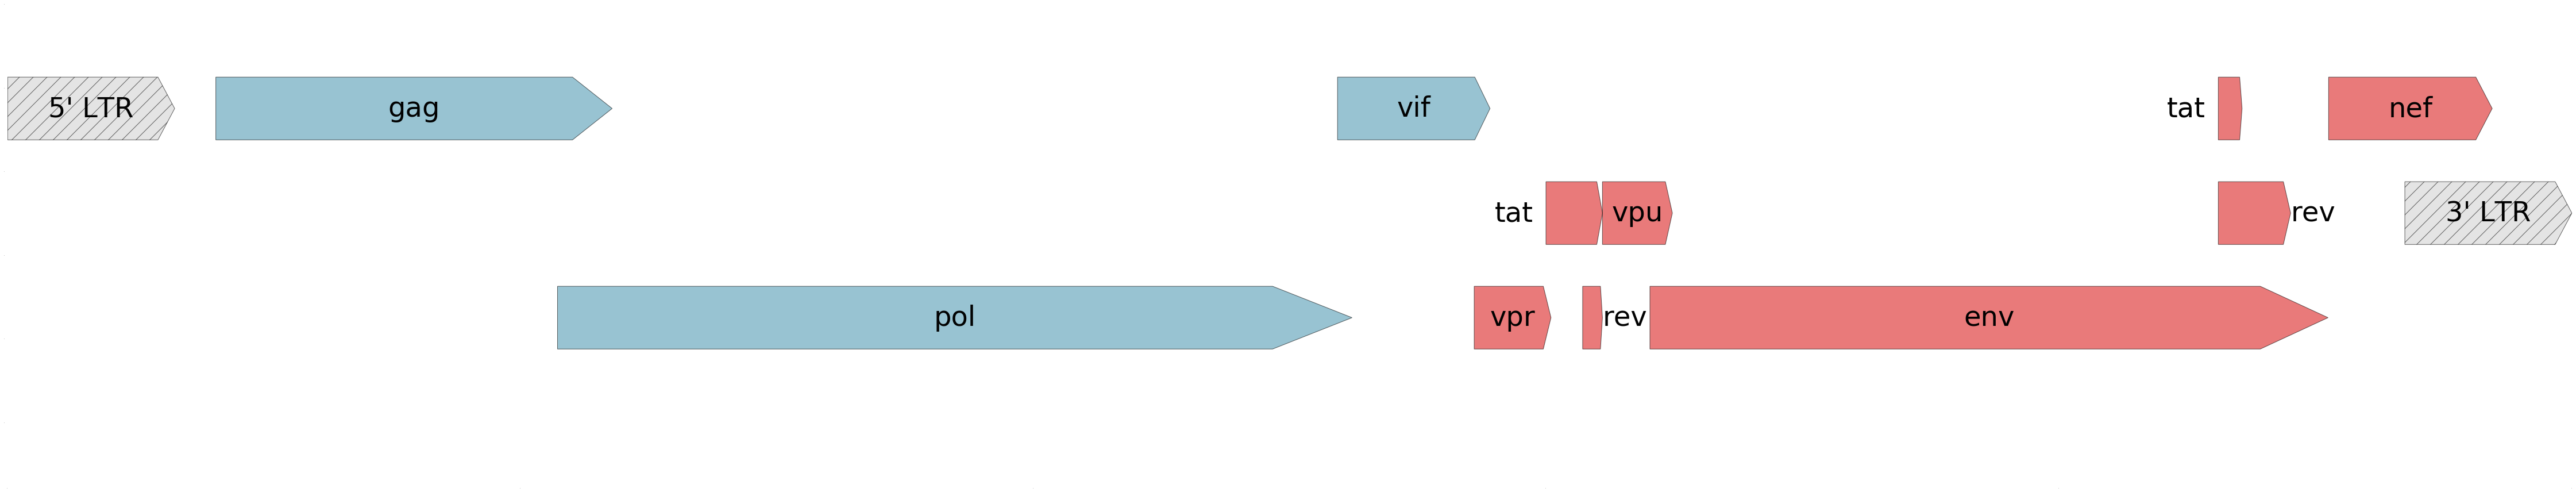

In [15]:
# ##########
# ## Plot genome map & breakpoints
# ##########

# fig, genome = plt.subplots(1, figsize=(80,15))

# genomeL=9719.0

# def rescale(x):
#     return (float(x)/genomeL)

# for gene, i in CDS.items():
#     length = rescale(i[1]-i[0])
#     if gene.startswith('rev'):
#         genome.text(rescale(i[0])+length, 0.25*i[2],'rev',va='center',ha='left',size=48,zorder=11)
#     elif gene.startswith('tat'):
#         genome.text(rescale(i[0])-.02, 0.25*i[2],'tat',va='center',ha='left',size=48,zorder=11)
#     elif gene == 'int':
#         pass
#     else:
#         genome.text(rescale(i[0])+0.5*length, 0.25*i[2],'%s'%(gene),va='center',ha='center',size=48,zorder=11)

#     if gene in three_prime:
#         c = colors['Mona_Monkey']
#     elif 'LTR' in gene:
#         c = 'lightgray'
#     else:
#         c = colors['Red-capped_Mangabey']
# #     else:
# #         c = 'lightgray'
# #     if gene == 'pol':
# #         genome.arrow(rescale(i[0]), .25*i[2], length, 0.0, alpha=0.6,head_width=0.15, width=0.15,head_length=0.0,length_includes_head=True,facecolor=c)
#     if 'LTR' in gene:
#         genome.arrow(rescale(i[0]), .25*i[2], length, 0.0, hatch='/', alpha=0.6,head_width=0.15, width=0.15,head_length=0.1*rescale(i[1]-i[0]),length_includes_head=True,facecolor=c)
#     else:
#         genome.arrow(rescale(i[0]), .25*i[2], length, 0.0, alpha=0.6,head_width=0.15, width=0.15,head_length=0.1*rescale(i[1]-i[0]),length_includes_head=True,facecolor=c)
        
# # plt.eventplot([rescale(bp) for bp in breakpoints], orientation='horizontal', lineoffsets=0.5,
# #           linelengths=1, linewidths=5, linestyles='dashed', color='k')
# # genome.text(0, -0.05, '0', size=42, ha='center')
# # genome.text(1, -0.05, '9719', size=42, ha='center')
# # for bp in breakpoints:
# #     genome.text(rescale(bp), -0.10, '%d'%int(bp), size=42, ha='center')

# genome.set_ylim(-0.15, 1.0) ## set y limits
# genome.set_xlim(0.0,1.0)

# genome.spines['top'].set_visible(False)
# genome.spines['right'].set_visible(False)
# genome.spines['left'].set_visible(False)
# genome.spines['bottom'].set_visible(False)

# genome.tick_params(axis='x',labelsize=0,size=0)
# genome.tick_params(axis='y',labelsize=0,size=0)

# plt.savefig('vc_cpz_2003.png', bbox_inches='tight')  
    
# plt.show()